In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('E:\inoventa\ML\glass_data.csv')

In [155]:
dataset.head()

,ID,RI,NA,MG,AL,SI,K,CA,BA,FE,TYPE _OF_GLASS
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [156]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,10]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [158]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [159]:
y_pred = classifier.predict(X_test)

In [160]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  2  2  0  0  0]
 [ 0  1  0  1  0  1]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  5]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        12
          2       0.85      1.00      0.92        17
          3       1.00      0.50      0.67         4
          5       1.00      0.33      0.50         3
          6       1.00      1.00      1.00         2
          7       0.83      1.00      0.91         5

avg / total       0.92      0.91      0.89        43



In [161]:
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

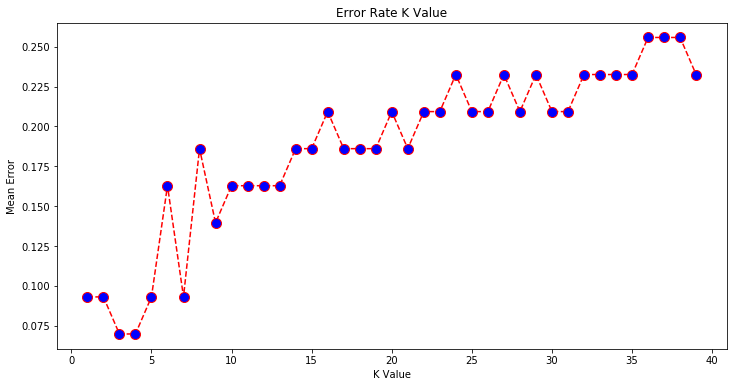

In [162]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed',
         marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()